NAME : VISHWAKARMA POOJA RAMASHANKAR 
SR.NO : 00-0-0-40-52-22-1-21633

In [1]:
# Importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data_df = pd.read_csv("../data/RawLeakData/2464.csv")
print(data_df.shape)
print(data_df["Meter ID"].unique())
data_df["Date"] = pd.to_datetime(data_df["Date"], errors='coerce')
data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.hour, unit='h')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.minute, unit='m')
data_df = data_df.drop(['Time'],axis=1)
data_df = data_df.set_axis(['Leak', 'Date', 'Flowrate', 'Netflow', 'Pressure', 'ID'], axis=1)

data_df.loc[(data_df["ID"] == 'SE3DM0202'), "ID"] = 1
data_df.loc[(data_df["ID"] == 'S3DM0805'), "ID"] = 2
data_df.loc[(data_df["ID"] == 'SE3DM0101'), "ID"] = 3
data_df.loc[(data_df["ID"] == 'SW4SM0701'), "ID"] = 4
data_df.loc[(data_df["ID"] == 'SW4SM0702'), "ID"] = 5
data_df.loc[(data_df["ID"] == 'S3DM0804'), "ID"] = 6

filtered_df1 = data_df.loc[(data_df['ID'] == 1)]
filtered_df2 = data_df.loc[(data_df['ID'] == 2)]
filtered_df3 = data_df.loc[(data_df['ID'] == 3)]
filtered_df4 = data_df.loc[(data_df['ID'] == 4)]
filtered_df5 = data_df.loc[(data_df['ID'] == 5)]
filtered_df6 = data_df.loc[(data_df['ID'] == 6)]

dta = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(filtered_df1, filtered_df2, on='Date', suffixes=("_1", "_2")),
                filtered_df3, on='Date', suffixes=("_3", "_4")
            ),
            filtered_df4, on="Date", suffixes=("_5", "_6")
        ),
        filtered_df5, on="Date", suffixes=("_7", "_8")
    ),
    filtered_df6, on="Date", suffixes=("_9", "_10")
)
# Apply z-score normalization and filtering for Flowrate columns
for i in range(1, 7):
    flowrate_column = f"Flowrate_{i}"
    if flowrate_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[flowrate_column] = pd.to_numeric(dta[flowrate_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[flowrate_column]], nan_policy='omit')) < 2).all(axis=1)]

# Apply z-score normalization and filtering for Pressure columns
for i in range(1, 7):
    pressure_column = f"Pressure_{i}"
    if pressure_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[pressure_column] = pd.to_numeric(dta[pressure_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[pressure_column]], nan_policy='omit')) < 2).all(axis=1)]
dta.loc[:,"LeakStatus"] = 0
dta.loc[(dta['Date'] >= '2017-10-01') & (dta['Date'] <= '2017-12-11'), "LeakStatus"] = 1
# TODO: To check with Sir
# fig, axs = plt.subplots(1, 1)
# #plt.ylim((0,20))
# plt.xticks(rotation=90)
# axs.scatter(dta["Date"],dta["Pressure_2"], marker='*', s=1)
# #axs.scatter(filtered_pdf2["Date"],filtered_pdf2["Pressure"], c='g', marker='.', s=1)
# #axs.scatter(filtered_pdf3["Date"],filtered_pdf3["Pressure"], c='r', marker='.', s=1)
# #axs.scatter(filtered_pdf4["Date"],filtered_pdf4["Pressure"], c='y', marker='.', s=1)
# axs.axvline(x = pd.Timestamp('2017-12-09'), color = 'r')
# Creating the directory if it doesn't exist
output_directory = "../data/EachLeakData"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
dta.to_csv("../data/EachLeakData/2464.csv", index=False)

(310263, 7)
['SE3DM0202' 'S3DM0805' 'SE3DM0101' 'SW4SM0701' 'SW4SM0702' 'S3DM0804']


/var/folders/wv/c6by5h8d0tz81wvfwp8rr4g40000gn/T/ipykernel_56630/4294177956.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')


In [3]:
print(dta.shape)
print(dta.isna().sum())
print(dta.columns)
dta

(26895, 32)
Leak_1         0
Date           0
Flowrate_1     0
Netflow_1      0
Pressure_1     0
ID_1           0
Leak_2         0
Flowrate_2     0
Netflow_2      0
Pressure_2     0
ID_2           0
Leak_5         0
Flowrate_5     0
Netflow_5      0
Pressure_5     0
ID_5           0
Leak_6         0
Flowrate_6     0
Netflow_6      0
Pressure_6     0
ID_6           0
Leak_9         0
Flowrate_9     0
Netflow_9      0
Pressure_9     0
ID_9           0
Leak_10        0
Flowrate_10    0
Netflow_10     0
Pressure_10    0
ID_10          0
LeakStatus     0
dtype: int64
Index(['Leak_1', 'Date', 'Flowrate_1', 'Netflow_1', 'Pressure_1', 'ID_1',
       'Leak_2', 'Flowrate_2', 'Netflow_2', 'Pressure_2', 'ID_2', 'Leak_5',
       'Flowrate_5', 'Netflow_5', 'Pressure_5', 'ID_5', 'Leak_6', 'Flowrate_6',
       'Netflow_6', 'Pressure_6', 'ID_6', 'Leak_9', 'Flowrate_9', 'Netflow_9',
       'Pressure_9', 'ID_9', 'Leak_10', 'Flowrate_10', 'Netflow_10',
       'Pressure_10', 'ID_10', 'LeakStatus'],
      d

,Leak_1,Date,Flowrate_1,Netflow_1,Pressure_1,ID_1,Leak_2,Flowrate_2,Netflow_2,Pressure_2,...,Flowrate_9,Netflow_9,Pressure_9,ID_9,Leak_10,Flowrate_10,Netflow_10,Pressure_10,ID_10,LeakStatus
39,9,2016-10-01 10:00:00,6.38,2308020.0,1.48,1,9,53.98,173374.9,4.96,...,1.78,13260.51,11.12,5,9,212.55,1076690.0,1.32,6,0
40,9,2016-10-01 10:15:00,6.85,2308022.0,1.44,1,9,48.05,173386.9,4.44,...,1.78,13260.96,11.16,5,9,202.43,1076741.0,1.32,6,0
41,9,2016-10-01 10:30:00,5.86,2308024.0,1.44,1,9,44.82,173398.2,4.08,...,2.65,13261.62,11.12,5,9,193.04,1076789.0,1.28,6,0
42,9,2016-10-01 10:45:00,7.48,2308025.0,1.44,1,9,48.94,173410.4,4.08,...,2.97,13262.36,11.16,5,9,188.75,1076836.0,1.28,6,0
44,9,2016-10-02 06:00:00,0.00,2311735.0,1.32,1,9,0.00,173570.7,0.00,...,47.03,13378.88,11.12,5,9,0.00,1079548.0,1.32,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38210,9,2018-04-09 15:45:00,147.44,4096689.0,1.20,1,9,54.19,472147.3,2.44,...,0.00,121881.50,11.12,5,9,126.55,2365812.0,2.32,6,0
38211,9,2018-04-09 16:00:00,154.07,4096727.0,1.32,1,9,52.03,472160.3,2.52,...,0.00,121881.50,11.12,5,9,127.65,2365844.0,2.52,6,0
38212,9,2018-04-09 16:15:00,152.87,4096765.0,1.32,1,9,53.60,472173.8,2.48,...,0.00,121881.50,11.12,5,9,128.33,2365876.0,2.60,6,0
38213,9,2018-04-09 16:30:00,153.52,4096804.0,1.36,1,9,53.27,472187.0,2.60,...,0.00,121881.50,11.16,5,9,125.99,2365908.0,2.52,6,0


In [4]:
# Selecting the features and target
X = dta[['Leak_1', 'Flowrate_1', 'Pressure_1', 'Flowrate_2', 'Pressure_2',
         'Flowrate_5', 'Pressure_5', 'Flowrate_6', 'Pressure_6',  
         'Flowrate_9','Pressure_9','Flowrate_10', 'Pressure_10']]
y = dta['LeakStatus']
print(X)
print(y)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Leak_1  Flowrate_1  Pressure_1  Flowrate_2  Pressure_2  Flowrate_5  \
39          9        6.38        1.48       53.98        4.96       67.82   
40          9        6.85        1.44       48.05        4.44       54.14   
41          9        5.86        1.44       44.82        4.08       49.78   
42          9        7.48        1.44       48.94        4.08       22.78   
44          9        0.00        1.32        0.00        0.00        0.30   
...       ...         ...         ...         ...         ...         ...   
38210       9      147.44        1.20       54.19        2.44       28.44   
38211       9      154.07        1.32       52.03        2.52        9.35   
38212       9      152.87        1.32       53.60        2.48        9.65   
38213       9      153.52        1.36       53.27        2.60        5.64   
38214       9      162.93        1.64       53.91        2.60        5.13   

       Pressure_5  Flowrate_6  Pressure_6  Flowrate_9  Pressure_9  \
39    

SVM Accuracy: 0.82
Train Accuracy: 0.8399022628280038
Test Accuracy: 0.8217870863799728
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7493
           1       0.26      0.83      0.40       576

    accuracy                           0.82      8069
   macro avg       0.62      0.83      0.65      8069
weighted avg       0.93      0.82      0.86      8069

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


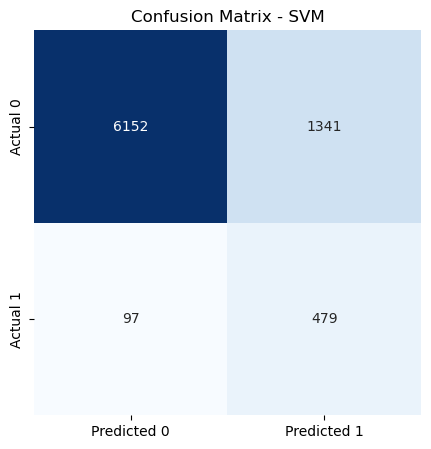

MLP Accuracy: 0.94
Train Accuracy: 0.9542122596409222
Test Accuracy: 0.943611352088239
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7493
           1       0.68      0.39      0.50       576

    accuracy                           0.94      8069
   macro avg       0.82      0.69      0.73      8069
weighted avg       0.94      0.94      0.94      8069

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


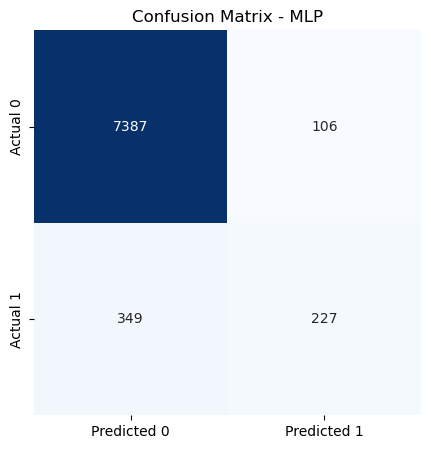

In [5]:
# Defining the models to evaluate
models = [
    ('SVM', SVC(C=3000000.0, kernel='rbf', class_weight='balanced')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(1000, 100, 10), activation='relu', max_iter=3000000000))
]

# Loop through each model and evaluate
for name, model in models:
    # Training the model on the training data
    model.fit(X_train, y_train)
    # Making predictions on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f'Train Accuracy: {model.score(X_train, y_train)}')
    print(f'Test Accuracy: {model.score(X_test, y_test)}')
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Printing the first 25 rows of predictions and actual values
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)[:25])

    # Plotting confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()